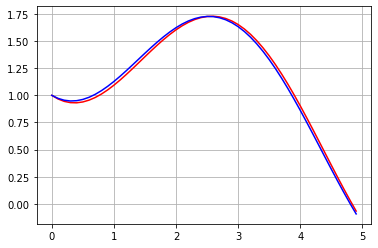

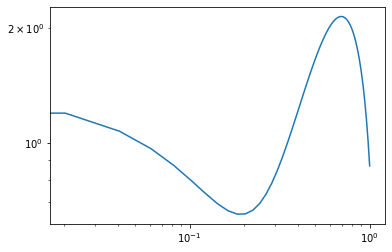

In [38]:
import numpy as np
import matplotlib.pyplot as plt
  
def euler_1d (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax)

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0

    # now compute the range using Euler's approximation
    for i in range (1, len(x)):
        x[i] = x[i-1] + h
        y[i] = y[i-1] + h*f(x[i-1], y[i-1])

    # return the solution
    return x, y

def main():
    # define your function f(x, y) as a lambda function
    # specify x even if x does not show up in f(x, y)
    f = lambda x, y: -(1/3)*y + np.sin(x)

    # specify the initial conditions
    x0 = 0
    y0 = 1

    # specify the max in your domain
    xmax = 10

    # specify the increment in x
    dx = 0.1

    # get the solution of the differential equation
    x, y = euler_1d (f, x0, y0, xmax, dx)

    # display the  numerical solution
    plt.plot (x, y, 'red')

    # for the vector (domain) x get the analytical range y_actual
    y_actual = (1/10) * (19 * np.exp(-x/3) + 3 * np.sin(x) - 9 * np.cos(x))

    # display the analytical solution
    plt.plot (x, y_actual, 'blue')

    plt.grid()
    plt.show()

    # estimate the error of your numerical solution
    # obtain the root-mean-square of your residuals (y - y_actual)
    std = [np.sqrt(np.mean((f(x[i], y[i]) - y_actual[i])**2)) for i in range(len(x))]
    h_space = np.linspace(0, 1, len(x))
    plt.loglog(h_space, std)

    # print both dx and std to the same precision for comparison

main()

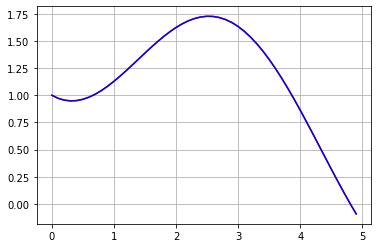

In [27]:
def euler_midpoint (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax)

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)
    m = np.zeros_like(x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0
    m[0] = f(x[0], y[0])

    # now compute the range using Euler's approximation
    for i in range (1, len(x)):
        m[i-1] = f(x[i-1], y[i-1])
        y_temp = y[i-1] + (h/2) * m[i-1]
        x[i] = x[i-1] + h
        y[i] = y[i-1] + h*f(x[i-1] + h/2, y_temp)

    # return the solution
    return x, y

def main():
    # define your function f(x, y) as a lambda function
    # specify x even if x does not show up in f(x, y)
    f = lambda x, y: -(1/3)*y + np.sin(x)

    # specify the initial conditions
    x0 = 0
    y0 = 1

    # specify the max in your domain
    xmax = 10

    # specify the increment in x
    dx = 0.1

    # get the solution of the differential equation
    x, y = euler_midpoint (f, x0, y0, xmax, dx)

    # display the  numerical solution
    plt.plot (x, y, 'red')

    # for the vector (domain) x get the analytical range y_actual
    y_actual = (1/10) * (19 * np.exp(-x/3) + 3 * np.sin(x) - 9 * np.cos(x))

    # display the analytical solution
    plt.plot (x, y_actual, 'blue')

    plt.grid()
    plt.show()

    # estimate the error of your numerical solution
    # obtain the root-mean-square of your residuals (y - y_actual)
    std = np.sqrt(np.mean((y - y_actual)**2))

    # print both dx and std to the same precision for comparison

main()